In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import rcparams
plt.rcParams.update(rcparams)

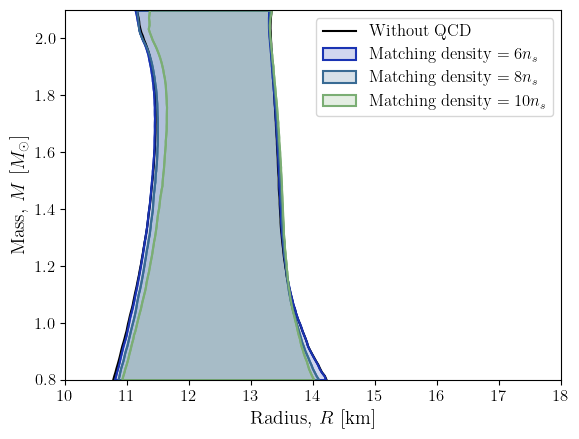

In [2]:
y = np.linspace(0.8, 2.1, 100)

fig, ax = plt.subplots()

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles.csv')

ax.plot(quantiles.loc[5,:].values, y, color='k', label='Without QCD')
ax.plot(quantiles.loc[95,:].values, y, color='k')

ns_list = [6,8,10]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_ns{ns:02}_Xmarg.csv')
    
    ax.fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.2], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        label=f'Matching density $={ns}n_s$'
        )
    
    ax.fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        zorder=2
        )

ax.legend(loc='upper right')

ax.set_xlim(10, 18)
ax.set_ylim(y[0], y[-1])

ax.set_xlabel('Radius, $R$ [km]')
ax.set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig('figures/mass_vs_radius_Xmarg.pdf', bbox_inches='tight')

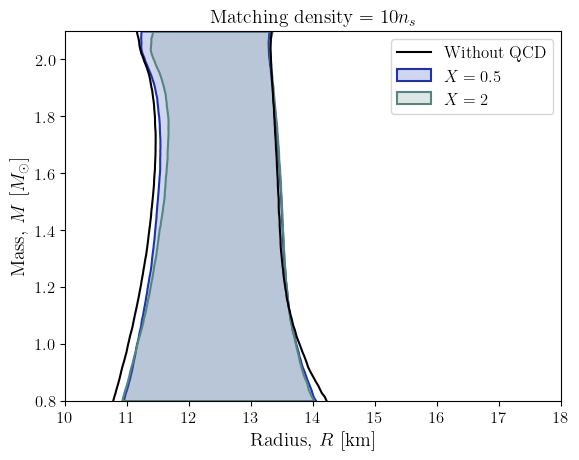

In [3]:
y = np.linspace(0.8, 2.1, 100)

fig, ax = plt.subplots()

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles.csv')

ax.plot(quantiles.loc[5,:].values, y, color='k', label='Without QCD')
ax.plot(quantiles.loc[95,:].values, y, color='k')

ns = 10
X_list = [0.5, 2]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_ns{ns:02}_X{X}.csv')
    
    ax.fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(X_list))))[:3]+[0.2], 
        edgecolor=cm.imola(i/(len(X_list))),
        linewidth=1.5,
        label=f'$X={X}$'
        )

ax.legend(loc='upper right')

ax.set_xlim(10, 18)
ax.set_ylim(y[0], y[-1])

ax.set_title(f'Matching density $={ns:02}n_s$')
ax.set_xlabel('Radius, $R$ [km]')
ax.set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig(f'figures/mass_vs_radius_ns{ns:02}_Xcomparison.pdf', bbox_inches='tight')

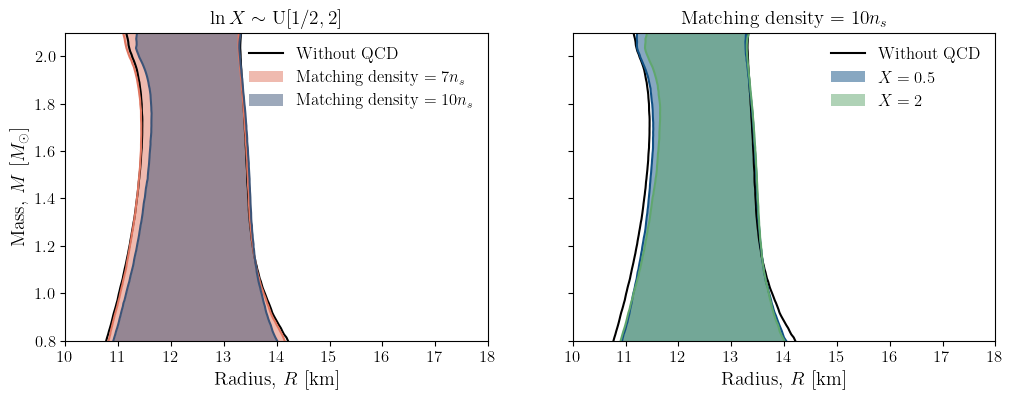

In [4]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))

y = np.linspace(0.8, 2.1, 100)

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles.csv')

for ax in axs:
    ax.plot(quantiles.loc[5,:].values, y, color='k', label='Without QCD')
    ax.plot(quantiles.loc[95,:].values, y, color='k')

axs[0].set_title('$\ln{X} \sim \mathrm{U}[1/2,2]$')

ns_list = [7,10]
c_list = [cm.lipari(0.65), cm.lipari(0.2)]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_ns{ns:02}_Xmarg.csv')

    axs[0].fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'Matching density $={ns}n_s$'
        )
    
    axs[0].plot( 
        quantiles.loc[5,:].values,
        y,
        color=c_list[i],
        zorder=2
        )
    
    axs[0].plot(
        quantiles.loc[95,:].values,
        y,
        color=c_list[i],
        zorder=2
        )


ns = 10
axs[1].set_title(f'Matching density $={ns:02}n_s$')

X_list = [0.5, 2]
c_list = [cm.navia(0.2), cm.navia(0.65)]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_ns{ns:02}_X{X}.csv')

    axs[1].fill_betweenx(
        y, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'$X={X}$'
        )
    
    axs[1].plot( 
        quantiles.loc[5,:].values,
        y,
        color=c_list[i],
        zorder=2
        )
    
    axs[1].plot(
        quantiles.loc[95,:].values,
        y,
        color=c_list[i],
        zorder=2
        )

axs[0].legend(loc='upper right', frameon=False)
axs[1].legend(loc='upper right', frameon=False)

axs[0].set_xlim(10, 18)
axs[0].set_ylim(y[0], y[-1])

axs[0].set_xlabel('Radius, $R$ [km]')
axs[1].set_xlabel('Radius, $R$ [km]')
axs[0].set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig('figures/mass_vs_radius.pdf', bbox_inches='tight')


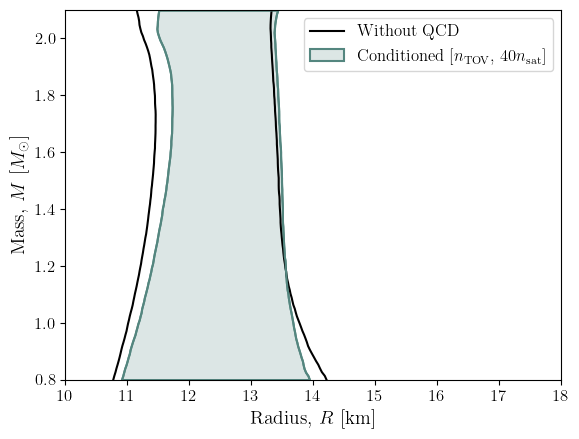

In [6]:
y = np.linspace(0.8, 2.1, 100)

fig, ax = plt.subplots()

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles.csv')

ax.plot(quantiles.loc[5,:].values, y, color='k', label='Without QCD')
ax.plot(quantiles.loc[95,:].values, y, color='k')

quantiles = pd.read_csv(f'quantiles/r_of_m_quantiles_marg.csv')

ax.fill_betweenx(
    y, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(i/(len(ns_list))))[:3]+[0.2], 
    edgecolor=cm.imola(i/(len(ns_list))),
    linewidth=1.5,
    label='Conditioned [$n_\mathrm{TOV}$, $40n_\mathrm{sat}$]',
    )

ax.fill_betweenx(
    y, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
    edgecolor=cm.imola(i/(len(ns_list))),
    linewidth=1.5,
    zorder=2
    )

ax.legend(loc='upper right')

ax.set_xlim(10, 18)
ax.set_ylim(y[0], y[-1])

ax.set_xlabel('Radius, $R$ [km]')
ax.set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig('figures/mass_vs_radius_marg.pdf', bbox_inches='tight')